#### Data analysis notebook

Reads in the data files and plot results

  * Instantiate analyzer class object **Geant4Analyzer(root_filename, label)**
  * Then apply cuts to the data
  * Plotting with the built-in function **plot_histogram()**
  * For user defined plots, just access the data elements directly: **Geant4Analyzer.data[element_name]**. Get the data element names from **Geant4Analyzer.data.keys()**

In [1]:
from RunManager import RunManager
from Geant4Analyzer import Geant4Analyzer
import matplotlib.pyplot as plt
import numpy as np

In [2]:
manager = RunManager("../scripts/config.json")
display(manager.display_all_runs(include_deleted=False))

,id,particle,energy,fastSimulation,maxScatters,maxEnergy,sourceVolume,outputDir,outputFile,numEvents,numJobs,randomSeed,settingsFile,status
0,run_01,gamma,1. MeV,false,-999,-1.0 MeV,,/data/xenon/acolijn/G4FastSim/20240903_160429,std,10000,1,96879,settings.json,active


In [3]:
# cut on the global event variables
cut = lambda data: (data['ncomp'] + data['nphot'] == 1) & (data['type'] == 0) & (data['e'] < 1200.) 
# additional cuts on the clusters
cut_hit = lambda data: (data['r'] < 1050.) & (np.abs(data['zh']) < 1050.) 

std = Geant4Analyzer("run_01", label="Geant4 standard", first_only=False)
std.preprocess_data(cut=cut, cut_hit=cut_hit)

Loading /data/xenon/acolijn/G4FastSim/20240903_160429/std_0.root
Data loaded from 1 files


In [7]:
# cut on the global event variables
cut = lambda data: (data['ncomp'] + data['nphot'] == 1) & (data['type'] == 0) & (data['e'] < 1200.) 
# additional cuts on the clusters
cut_hit = lambda data: (data['r'] < 1050.) & (np.abs(data['zh']) < 1050.) 

std = Geant4Analyzer("run_02", label="Geant4 standard", first_only=False)
std.preprocess_data(cut=cut, cut_hit=cut_hit)

fast = Geant4Analyzer("run_01", label="Accelerated MC", first_only=False)
fast.preprocess_data(cut=cut, cut_hit=cut_hit)

fast2 = Geant4Analyzer("run_03", label="Accelerated MC", first_only=False)
fast2.preprocess_data(cut=cut, cut_hit=cut_hit)


Loading /data/xenon/acolijn/G4FastSim/20240725_140336/std_1.root
Loading /data/xenon/acolijn/G4FastSim/20240725_140336/std_7.root
Loading /data/xenon/acolijn/G4FastSim/20240725_140336/std_9.root
Loading /data/xenon/acolijn/G4FastSim/20240725_140336/std_0.root
Loading /data/xenon/acolijn/G4FastSim/20240725_140336/std_4.root
Loading /data/xenon/acolijn/G4FastSim/20240725_140336/std_5.root
Loading /data/xenon/acolijn/G4FastSim/20240725_140336/std_6.root
Loading /data/xenon/acolijn/G4FastSim/20240725_140336/std_8.root
Loading /data/xenon/acolijn/G4FastSim/20240725_140336/std_2.root
Loading /data/xenon/acolijn/G4FastSim/20240725_140336/std_3.root
Data loaded from 10 files
Loading /data/xenon/acolijn/G4FastSim/20240725_140250/fast_7.root
Loading /data/xenon/acolijn/G4FastSim/20240725_140250/fast_4.root
Loading /data/xenon/acolijn/G4FastSim/20240725_140250/fast_0.root
Loading /data/xenon/acolijn/G4FastSim/20240725_140250/fast_2.root
Loading /data/xenon/acolijn/G4FastSim/20240725_140250/fast_5

integral = 6498.0
integral = 6326.824049534514


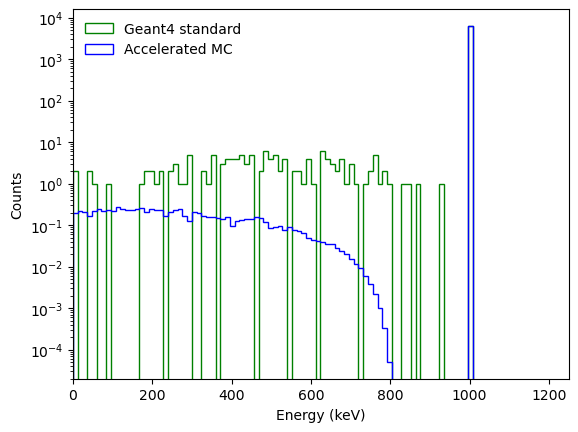

In [8]:
nbin = 250
ax = std.plot_histogram('eh', bins=nbin, range=(-1500,1500), show=False)
ax = fast.plot_histogram('eh', bins=nbin, ax=ax, range=(-1500,1500), show=False)

plt.yscale('log')
#plt.ylim(1e1, 1e4)
plt.xlim(0, 1250)

plt.legend(frameon=False)
plt.show()


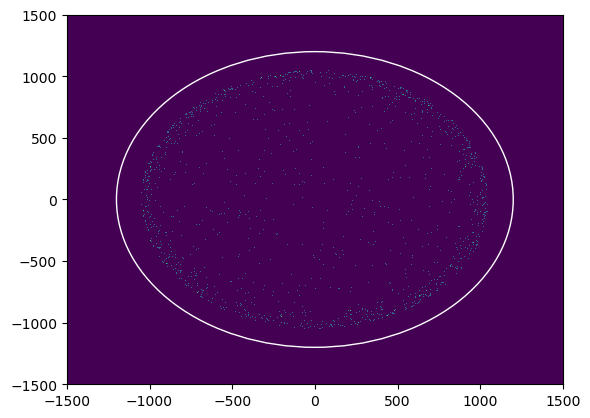

In [33]:
bins = 1000
h = plt.hist2d(std.data['xh'], std.data['yh'], bins=bins, range=((-1500, 1500), (-1500, 1500)))
circle = plt.Circle((0,0), std.settings['innerCryostatRadius'], color='w', fill=False, linewidth=1)
plt.gca().add_artist(circle)
plt.show()

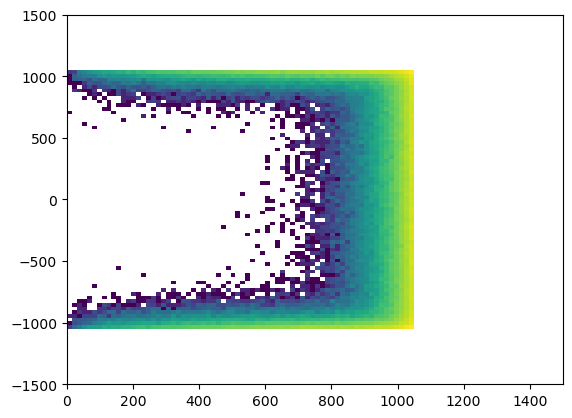

In [32]:
from matplotlib.colors import LogNorm

bins = 100
h = plt.hist2d(std.data['r'], std.data['zh'], bins=bins, range=((0, 1500), (-1500, 1500)), norm=LogNorm())
h = plt.hist2d(fast.data['r'], fast.data['zh'], bins=bins, range=((0, 1500), (-1500, 1500)), norm=LogNorm())

plt.show()

Data loaded from /data/xenon/acolijn/G4FastSim/20240724_210907/fast_0.root


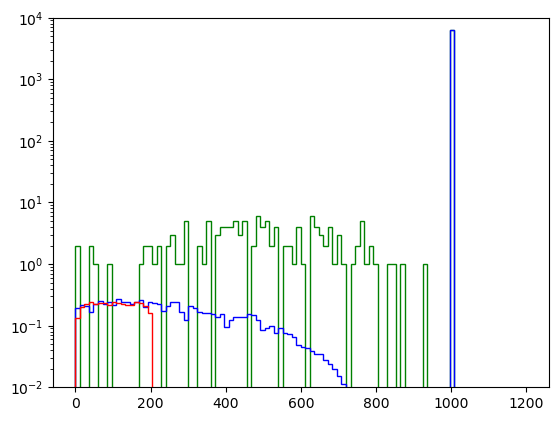

In [31]:
plt.hist(std.data['eh'], bins=100, range=(0, 1200), histtype='step', color='g', label='Geant4 standard')
plt.hist(fast.data['eh'], weights=np.exp(fast.data['wh']), bins=100, range=(0, 1200), histtype='step', color='b', label='Accelerated')
plt.hist(fast2.data['eh'], weights=np.exp(fast2.data['wh']), bins=100, range=(0, 1200), histtype='step', color='r', label='Accelerated')

plt.ylim(1e-2, 1e4)
plt.yscale('log')
plt.show()



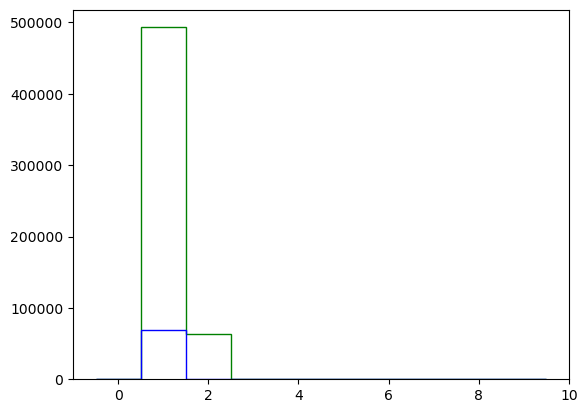

In [26]:
plt.hist(std.data['nclus'][(std.data['ncomp']+std.data['nphot'])==1], bins=10, range=(-0.5,9.5), histtype='step', color='g', label='Geant4 standard')
plt.hist(fast.data['nclus'], weights=np.exp(fast.data['w']), bins=10, range=(-0.5,9.5), histtype='step', color='b', label='Accelerated')

plt.show()

In [40]:
from RunManager import RunManager
from Geant4Analyzer import Geant4Analyzer
import matplotlib.pyplot as plt
import numpy as np

std_pencil  = Geant4Analyzer("run_11", first_only=False)
fast_pencil = Geant4Analyzer("run_10", first_only=False)

# fiducial volume definition
r_fid = std_pencil.settings['fiducialRadius']
z_fid = std_pencil.settings['fiducialHeight']/2.
e_cut = fast_pencil.settings['maxEnergy']

# cut on the global event variables
#cut = lambda data: (data['ncomp'] + data['nphot'] == 1) & (data['type'] == 0) & (data['e'] < 1200.) 
cut = lambda data: (data['nphot']==0) & (data['ncomp'] == 1) & (data['type'] == 0) & (data['e'] < e_cut) 

# additional cuts on the clusters
cut_hit = lambda data: (data['r'] < r_fid) & (np.abs(data['zh']) < z_fid) & (data['eh'] > 0) & (data['eh'] < 600)

std_pencil.preprocess_data(cut=cut, cut_hit=cut_hit)
fast_pencil.preprocess_data(cut=cut, cut_hit=cut_hit)

Loading /data/xenon/acolijn/G4FastSim/20240726_162901/std_0.root
Data loaded from 1 files
Loading /data/xenon/acolijn/G4FastSim/20240726_102013/fast_0.root
Data loaded from 1 files


integral = 24433.0
integral = 24485.035113591002


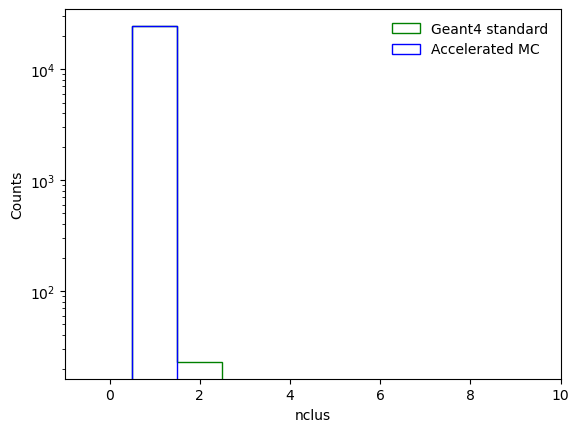

In [43]:
nbin = 10
ax = std_pencil.plot_histogram('nclus', bins=nbin, range=(-0.5,9.5), show=False)
ax = fast_pencil.plot_histogram('nclus', bins=nbin, ax=ax, range=(-0.5,9.5), show=False)

plt.yscale('log')
#plt.ylim(1e-1, 1e5)
#plt.xlim(0, 1250)

plt.legend(frameon=False)
plt.show()

integral = 24433.0
integral = 24485.03511359135


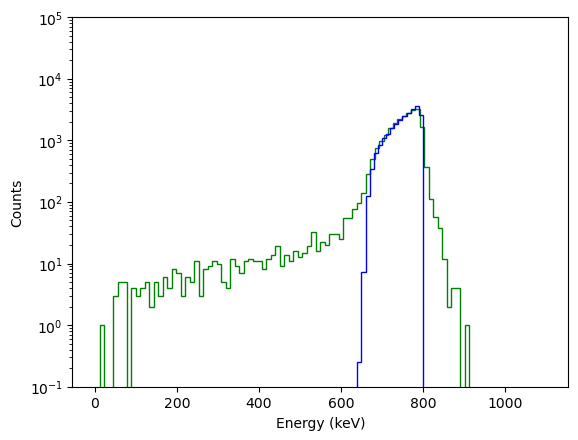

In [44]:
nbin =100
ax = std_pencil.plot_histogram('e', bins=nbin, range=(0.,1100), show=False)
ax = fast_pencil.plot_histogram('e', bins=nbin, ax=ax, range=(0.,1000), show=False)
plt.yscale('log')
plt.ylim(1e-1, 1e5)
plt.show()